In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('mod2.xlsx')
continuous_data = data.iloc[:, 1:7].values
binary_data = data.iloc[:, [7, 8]].values
merged_data = np.concatenate((continuous_data, binary_data), axis=1)

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data)
scores = []
max_clusters = 10

for num_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_data)
    scores.append(silhouette_score(scaled_data, kmeans.labels_))

c:\Users\Xiaomi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Xiaomi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Xiaomi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Xiaomi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

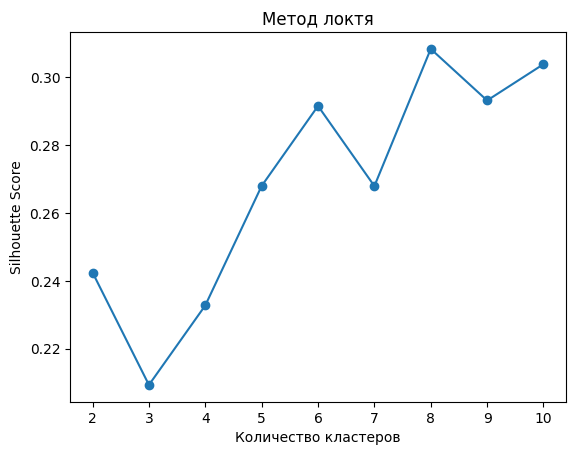

In [4]:
plt.plot(range(2, max_clusters+1), scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Метод локтя')
plt.show()

In [5]:
optimal_clusters = np.argmax(scores) + 2
print('Оптимальное количество кластеров:', optimal_clusters)

Оптимальное количество кластеров: 8


In [6]:
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_data)
labels = kmeans.labels_


c:\Users\Xiaomi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


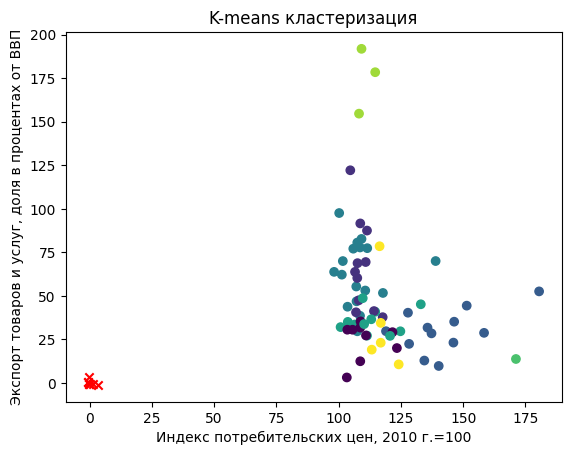

In [7]:
plt.scatter(continuous_data[:, 0], continuous_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[2])
plt.title('K-means кластеризация')
plt.show()

In [8]:
distances = kmeans.transform(scaled_data)
max_distances = np.max(distances, axis=1)

top_countries = []
for cluster_id in range(optimal_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    cluster_distances = max_distances[cluster_indices]
    max_index = cluster_indices[np.argmax(cluster_distances)]
    top_countries.append(data.iloc[max_index, 0])

print('Страны с наибольшим расстоянием до центра своего кластера:')
for country in top_countries:
    print(country)

Страны с наибольшим расстоянием до центра своего кластера:
Андорра
Ирландия
Маршалловы острова
ОАЭ
Босния и Герцеговина
Узбекистан
Люксембург
Макао
